In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# create dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1, cluster_std=2.5)

## Funtions to plot data

In [6]:
def plot_dataset(X, y, ax=None, title=None, **params):
    if ax is None:
        ax = plt.gca()
    ax.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=50, edgecolor='k', **params)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    if title is not None:
        ax.set_title(title)
    return ax

def make_grid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_classifier_decision(ax, clf, X, mode='line', **params):
    xx, yy = make_grid(X[:, 0], X[:, 1])

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    if mode == 'line':
        ax.contour(xx, yy, Z, **params)
    else:
        ax.contourf(xx, yy, Z, **params)
    ax.set_xlim((np.min(X[:, 0]), np.max(X[:, 0])))
    ax.set_ylim((np.min(X[:, 1]), np.max(X[:, 0])))
    
def plot_classifier_probability_map(ax, clf, X, **params):
    """Plot the decision border of a trained classifier.

    Parameters
    ----------
    ax : The axis use to plot the decision border

    clf : Classifier used in the plot. The classifier needs to implement the method predict(X) from sklearn

    X : array of shape = [n_samples, 2]
        The classification dataset considered in the plot

    **params : Other parameters used to change the plot

    Returns
    -------
    xx, yy : ndarray
    """
    xx, yy = make_grid(X[:, 0], X[:, 1])

    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.5, **params)
    ax.set_xlim((np.min(X[:, 0]), np.max(X[:, 0])))
    ax.set_ylim((np.min(X[:, 1]), np.max(X[:, 0])))

## Plotting data

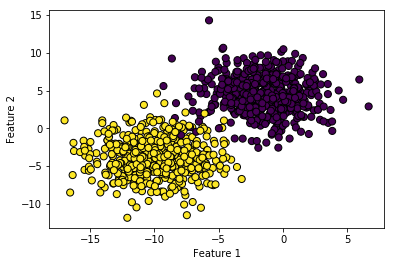

In [3]:
plot_dataset(X, y)

## Prepare data and train model

In [4]:
# divide data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# normalize data
scaler = StandardScaler()
scaler.fit(X_train, y_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# train (fit) model
logit = LogisticRegression().fit(X_train, y_train)

## Plot decision border

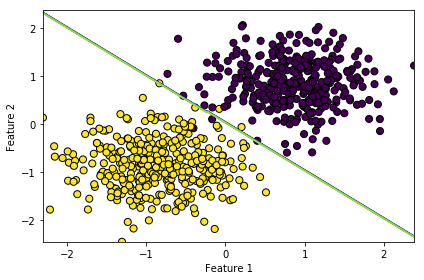

In [5]:
ax = plot_dataset(X_train, y_train)
plot_classifier_decision(ax, logit, X_train)
plt.tight_layout()
plt.savefig('Border Logistic regression.jpg', dpi=450)

## Plot probability map

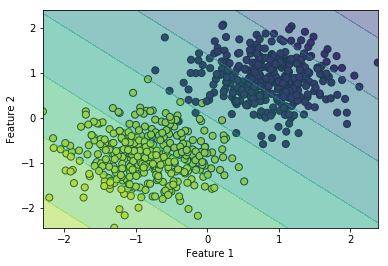

In [6]:
ax = plot_dataset(X_train, y_train)
plot_classifier_probability_map(ax, logit, X_train, levels=10) #Levels indicates how many probability maps in the graph
plt.savefig('probability Logistic regression.jpg', dpi=450)

## Non-linear problem
 
Logistic regression cannot solve non-linear problems directly. The decision is always linear

In [4]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.1)

X_train, X_test, y_train, y_test = train_test_split(X, y)
lr = LogisticRegression().fit(X_train, y_train)

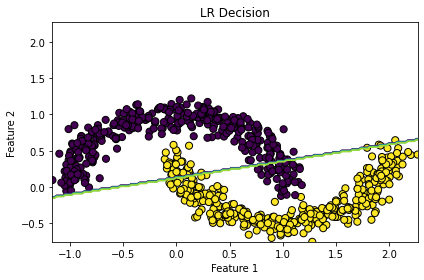

In [7]:
ax = plot_dataset(X_train, y_train, title='LR Decision')
ax = plot_classifier_decision(ax, lr, X_train)
plt.tight_layout()
plt.savefig('linear decision only.jpg', dpi=450)